In [24]:
import pandas as pd
import numpy as np

In [25]:
livros_df = pd.read_csv('./data/raw/Books.csv')
livros_df.head()

/var/folders/b0/hp3v65qj0xb4fx5b_txhdsnc0000gn/T/ipykernel_3795/2263326033.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  livros_df = pd.read_csv('./data/raw/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [26]:
livros_df = livros_df[['ISBN', 'Book-Title', 'Book-Author', 'Image-URL-M']]
livros_df.columns = ['isbn', 'titulo', 'autor', 'url_capa']

livros_df.head()

,isbn,titulo,autor,url_capa
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [27]:
livros_df.shape

(271360, 4)

In [28]:
reviews_df = pd.read_csv('./data/raw/Ratings.csv')
reviews_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
reviews_df.columns = ['usuario', 'isbn', 'nota']
reviews_df.head()

,usuario,isbn,nota
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
reviews_df.shape

(1149780, 3)

In [31]:
reviews_df.describe()

,usuario,nota
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


<Axes: >

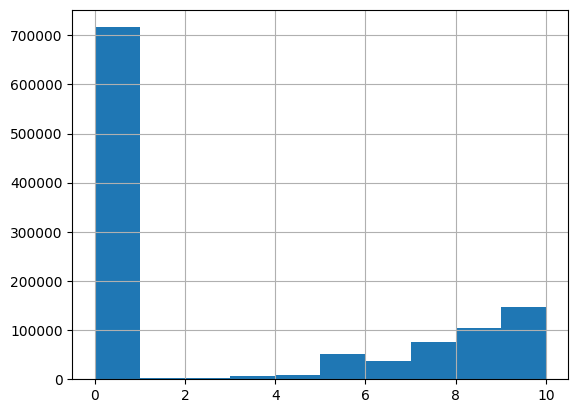

In [32]:
reviews_df['nota'].hist()

In [33]:
# Excluindo valores 0
reviews_df = reviews_df.query('nota != 0')

<Axes: >

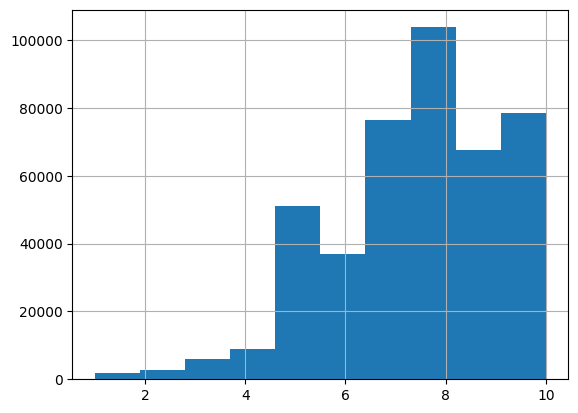

In [34]:
reviews_df['nota'].hist()

In [35]:
livros_reviews_df = livros_df.merge(reviews_df, on='isbn')

livros_reviews_df.head()

,isbn,titulo,autor,url_capa,usuario,nota
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [36]:
#agrupar por livro, com a media das notas
livros_reviews_df = livros_reviews_df.groupby(['isbn', 'titulo'])['nota'].mean().to_frame().reset_index()

livros_reviews_df.head()

,isbn,titulo,nota
0,0000913154,The Way Things Work: An Illustrated Encycloped...,8.0
1,0001046438,Liar,9.0
2,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",6.0
3,0001047213,The Fighting Man,9.0
4,0001047973,Brave New World,9.0


In [37]:
# Ordenação
livros_reviews_df.sort_values('nota', ascending=False)

,isbn,titulo,nota
23075,034017420X,Seven Men of Gascony Rfd Hpb,10.0
101866,0821414534,Ohio Is My Dwelling Place: Schoolgirl Embroide...,10.0
101839,0821225987,Physiognomy : The Mark Seliger Photographs,10.0
101842,0821226665,White on White : Creating Elegant Rooms with C...,10.0
101843,0821226703,Air and Space : The National Air and Space Mus...,10.0
...,...,...,...
134162,1903933145,The Desire and Pursuit of the Whole (New Editi...,1.0
22363,0324041594,The New York Times Guide to Economics,1.0
95124,0789725134,Special Edition Using Microsoft Office XP,1.0
130911,1857975065,Interest of Justice (OME),1.0


In [38]:
livros_reviews_df

,isbn,titulo,nota
0,0000913154,The Way Things Work: An Illustrated Encycloped...,8.0
1,0001046438,Liar,9.0
2,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",6.0
3,0001047213,The Fighting Man,9.0
4,0001047973,Brave New World,9.0
...,...,...,...
149831,B0001FZGPI,The Bonesetter's Daughter,7.0
149832,B0001FZGRQ,The Clan of the Cave Bear,9.0
149833,B0001GMSV2,Find Me,8.0
149834,B0001I1KOG,New York Public Library Literature Companion,10.0


In [39]:
# Todos os dados das duas tabelas
livros_ratings_completo_df = pd.merge(livros_df, reviews_df, on='isbn')

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [40]:
qtdade_reviews = livros_ratings_completo_df.groupby(by = ['isbn', 'titulo'])['nota'].count().reset_index()

qtdade_reviews = qtdade_reviews.rename(columns = {'nota': 'qtdade_reviews'})

qtdade_reviews.sort_values('qtdade_reviews', ascending=False).head(20)

,isbn,titulo,qtdade_reviews
21945,0316666343,The Lovely Bones: A Novel,707
117745,0971880107,Wild Animus,581
38819,0385504209,The Da Vinci Code,487
18058,0312195516,The Red Tent (Bestselling Backlist),383
4131,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320
68898,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,313
12325,0142001740,The Secret Life of Bees,307
51799,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,295
47986,044023722X,A Painted House,281
57625,0452282152,Girl with a Pearl Earring,278


In [41]:
display(livros_ratings_completo_df.head())
display(qtdade_reviews.head())

,isbn,titulo,autor,url_capa,usuario,nota
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,123629,9


,isbn,titulo,qtdade_reviews
0,0000913154,The Way Things Work: An Illustrated Encycloped...,1
1,0001046438,Liar,1
2,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",1
3,0001047213,The Fighting Man,1
4,0001047973,Brave New World,2


In [42]:
# total de ratings para o df completo
livros_ratings_completo_df = livros_ratings_completo_df.merge(qtdade_reviews, on = ['isbn', 'titulo'])

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota,qtdade_reviews
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5,9
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8,9
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,67544,8,9
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,116866,9,9
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,123629,9,9


In [45]:
# filtrar um pouco os livros com poucos ratings pra não poluir muito nossas recomendações
filtro_reviews = 20

livros_ratings_completo_df= livros_ratings_completo_df.query('qtdade_reviews >= @filtro_reviews').sort_values(by='qtdade_reviews', ascending=False)

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota,qtdade_reviews
9892,0316666343,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,32195,7,707
9850,0316666343,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,19107,10,707
9848,0316666343,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,17920,8,707
9847,0316666343,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,17588,8,707
9846,0316666343,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,17183,6,707


In [46]:
len(livros_ratings_completo_df['titulo'].unique())

1910

In [47]:
#Pivotar a tabela
livro_por_usuario = livros_ratings_completo_df.pivot_table(index='titulo', columns='usuario', values='nota').fillna(0)

livro_por_usuario.head()

usuario,9,16,17,26,32,39,42,44,51,56,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
titulo,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
"""
armazena apenas os elementos não nulos da matriz e suas posições correspondentes,
 economizando espaço em memória e acelerando as operações matriciais
"""
from scipy.sparse import csr_matrix

matriz_livro_por_usuario = csr_matrix(livro_por_usuario.values)

In [53]:
from sklearn.neighbors import NearestNeighbors

# métrica de distância é cosseno
modelo_recsys = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# treinamento de cada par de livros
modelo_recsys.fit(matriz_livro_por_usuario)

NearestNeighbors(algorithm='brute', metric='cosine')

In [54]:
livro_por_usuario.head()

usuario,9,16,17,26,32,39,42,44,51,56,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
titulo,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
livro_por_usuario.loc[livro_por_usuario.index.str.contains('Harry Potter'), ].index

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Chamber of Secrets Postcard Book',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))'],
      dtype='object', name='titulo')

In [56]:
livro_harry_potter = "Harry Potter and the Sorcerer's Stone (Book 1)"

posicao_harry_potter = livro_por_usuario.index.get_loc(livro_harry_potter)

posicao_harry_potter

600

In [57]:
# Buscar os 6 "vizinhos" mais parecidos com o livro 1 do Harry Potter
quantidade_recomendacoes = 6

distancias, indices = modelo_recsys.kneighbors(livro_por_usuario.iloc[posicao_harry_potter,:].values.reshape(1, -1), n_neighbors = quantidade_recomendacoes)

print(f'Livro: {livro_por_usuario.index[posicao_harry_potter]} - índice {posicao_harry_potter}')

Livro: Harry Potter and the Sorcerer's Stone (Book 1) - índice 600


In [58]:
for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_por_usuario.index[posicao_harry_potter]))
    else:
        print('{0}: {1}, com a distância de {2}:'.format(i, livro_por_usuario.index[indices.flatten()[i]], distancias.flatten()[i]))

Recomendações para Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), com a distância de 0.6232481013501476:
2: Harry Potter and the Prisoner of Azkaban (Book 3), com a distância de 0.6280930244801939:
3: Harry Potter and the Goblet of Fire (Book 4), com a distância de 0.6368906640779892:
4: Harry Potter and the Order of the Phoenix (Book 5), com a distância de 0.7453910756400858:
5: The Hobbit: or There and Back Again, com a distância de 0.8616911944642508:


In [59]:
quantidade_recomendacoes = 21

distancias, indices = modelo_recsys.kneighbors(livro_por_usuario.iloc[posicao_harry_potter,:].values.reshape(1, -1), n_neighbors = quantidade_recomendacoes)

for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_por_usuario.index[posicao_harry_potter]))
    else:
        print('{0}: {1}, com a distância de {2}:'.format(i, livro_por_usuario.index[indices.flatten()[i]], distancias.flatten()[i]))

Recomendações para Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), com a distância de 0.6232481013501476:
2: Harry Potter and the Prisoner of Azkaban (Book 3), com a distância de 0.6280930244801939:
3: Harry Potter and the Goblet of Fire (Book 4), com a distância de 0.6368906640779892:
4: Harry Potter and the Order of the Phoenix (Book 5), com a distância de 0.7453910756400858:
5: The Hobbit: or There and Back Again, com a distância de 0.8616911944642508:
6: The Fellowship of the Ring (The Lord of the Rings, Part 1), com a distância de 0.9063649576728228:
7: Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1), com a distância de 0.9091439346701685:
8: Nerilka's Story (Dragonriders of Pern (Paperback)), com a distância de 0.9122864621350675:
9: The Two Towers (The Lord of the Rings, Part 2), com a distância de 0.9173503592492307:
10: The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2), com a distância de 0